# Explanatory Data Analysis (already done!)

# Data Visualization (already done!)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from pprint import pprint

In [2]:
df = pd.read_csv(r"C:\Users\dimit\OneDrive\Bureau\Pace classes\CS 675 - Introduction to Data Science\Project #1\telco-customer-churn.csv")
# df = pd.read_csv(r'C:\Users\dimit\Downloads\creditcard.csv').dropna()
if 'Class' in list(df.columns):
    df['Class'] = df['Class'].astype('int')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
if 'TotalCharges' in list(df.columns):
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data preprocessing

## Data imputation

In [6]:
print(list(df.columns))
print('TotalCharges' in list(df.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
True


In [7]:
if 'TotalCharges' in list(df.columns):
    df['TotalCharges'] = df['TotalCharges'].fillna(0).astype('float64')

## Encode categorical features

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
df_copy = df.copy() #using a copy of the dataset to conserve the properties of the initial dataset
if 'customerID' in list(df_copy.columns):
    df_copy = df_copy.iloc[:,1:]
from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df_copy.columns.values.tolist()
for col in features:
    if df_copy[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df_copy.columns:
        le = LabelEncoder()
        le.fit(list(df_copy[col].astype(str).values))
        df_copy[col] = le.transform(list(df_copy[col].astype(str).values))
df_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [10]:
X = df_copy.iloc[:,:-1].values
y = df_copy.iloc[:,-1].values
# print(y.type)

In [11]:
X.shape

(7043, 19)

## Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = SelectKBest(chi2, k=5).fit_transform(X, y)
X.shape

(7043, 5)

Here I am using univariate feature selection with the chi-square test to select the best 5 features of out 19 initially

In [13]:
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 2.9850e+01, 2.9850e+01],
       [3.4000e+01, 2.0000e+00, 1.0000e+00, 5.6950e+01, 1.8895e+03],
       [2.0000e+00, 2.0000e+00, 0.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [1.1000e+01, 2.0000e+00, 0.0000e+00, 2.9600e+01, 3.4645e+02],
       [4.0000e+00, 0.0000e+00, 0.0000e+00, 7.4400e+01, 3.0660e+02],
       [6.6000e+01, 2.0000e+00, 2.0000e+00, 1.0565e+02, 6.8445e+03]])

## Feature  Scaling

In [14]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X = rc.fit_transform(X)
X.shape

(7043, 5)

# Split the training/test datasets in the 80/20 % ratio

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)
X_train.shape

(5634, 5)

## Fit your model on the original dataset, evaluate it, and tune the hyperparameters

# Analysis Stage 1

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [18]:
results_df = pd.DataFrame(columns = ['Classifier','Analysis Stage','y','Grid Search','Accuracy','Precision','Recall','F1-Score'])

In [19]:
print(X_test.shape)
print(y_test.shape)

(1409, 5)
(1409,)


### The Machine Learning models to be used are: Naïve Bayes, Logistic Regression, Random Forests, XGBoost

In [20]:
classfiers  = {'Naive Bayes':GaussianNB(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest':RandomForestClassifier(),
               'XGBoost':XGBClassifier(),
              }

Fitting and training Naive Bayes classifier to the training data and evaluating against test set


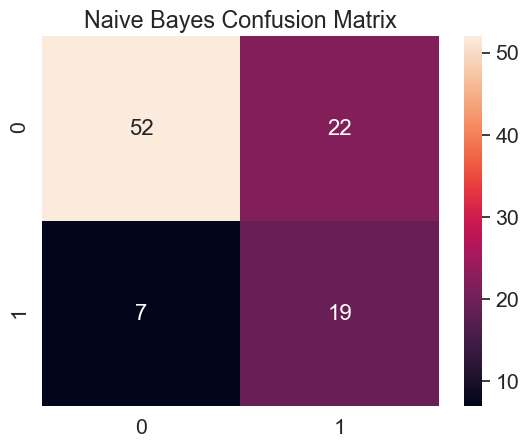

GaussianNB()
Fitting and training Logistic Regression classifier to the training data and evaluating against test set


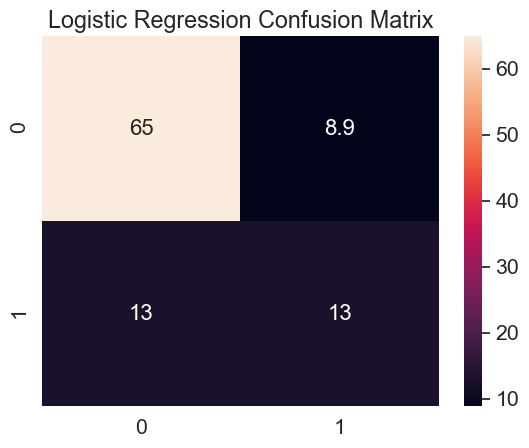

LogisticRegression()
Fitting and training Random Forest classifier to the training data and evaluating against test set


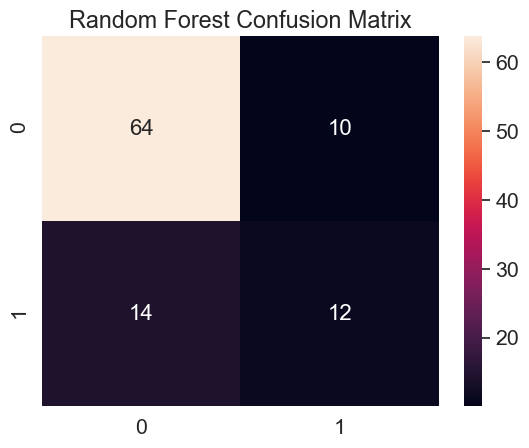

RandomForestClassifier()
Fitting and training XGBoost classifier to the training data and evaluating against test set
[18:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dimit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


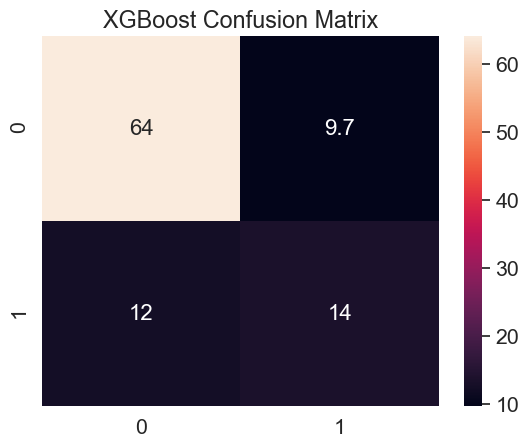

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [21]:
for classifier in classfiers.keys():
    print('Fitting and training {classifier} classifier to the training data and evaluating against test set'.format(classifier = classifier))
    classfiers[classifier].fit(X_train, y_train)
    y_pred = classfiers[classifier].predict(X_test)
    cm = (confusion_matrix(y_test,y_pred) / confusion_matrix(y_test,y_pred).astype(np.float).sum()) *100
    df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
    plt.show()
    print(classfiers[classifier])
    CR = classification_report(y_test,y_pred, output_dict=True)
    CR = pd.DataFrame(CR).transpose()[:2]
    for line_number in range(0,len(CR)):
        results_df = results_df.append({'Classifier':classifier,'Analysis Stage':1,'y':line_number,'Grid Search':'No',
                                       'Accuracy':accuracy_score(y_test, y_pred),'Precision':CR['precision'][line_number],
                                        'Recall':CR['recall'][line_number],'F1-Score':CR['f1-score'][line_number]
                                       },ignore_index=True)#CR['recall'][line_number]

In [22]:
results_df.sort_values(by = ['Recall'], ascending=False)

,Classifier,Analysis Stage,y,Grid Search,Accuracy,Precision,Recall,F1-Score
2,Logistic Regression,1,0,No,0.779986,0.832575,0.878963,0.855140
6,XGBoost,1,0,No,0.777857,0.837037,0.868396,0.852428
4,Random Forest,1,0,No,0.754436,0.815622,0.862632,0.838469
1,Naive Bayes,1,1,No,0.711143,0.466205,0.730978,0.569312
0,Naive Bayes,1,0,No,0.711143,0.881010,0.704131,0.782702
7,XGBoost,1,1,No,0.777857,0.583587,0.521739,0.550933
3,Logistic Regression,1,1,No,0.779986,0.593548,0.500000,0.542773
5,Random Forest,1,1,No,0.754436,0.535714,0.448370,0.488166


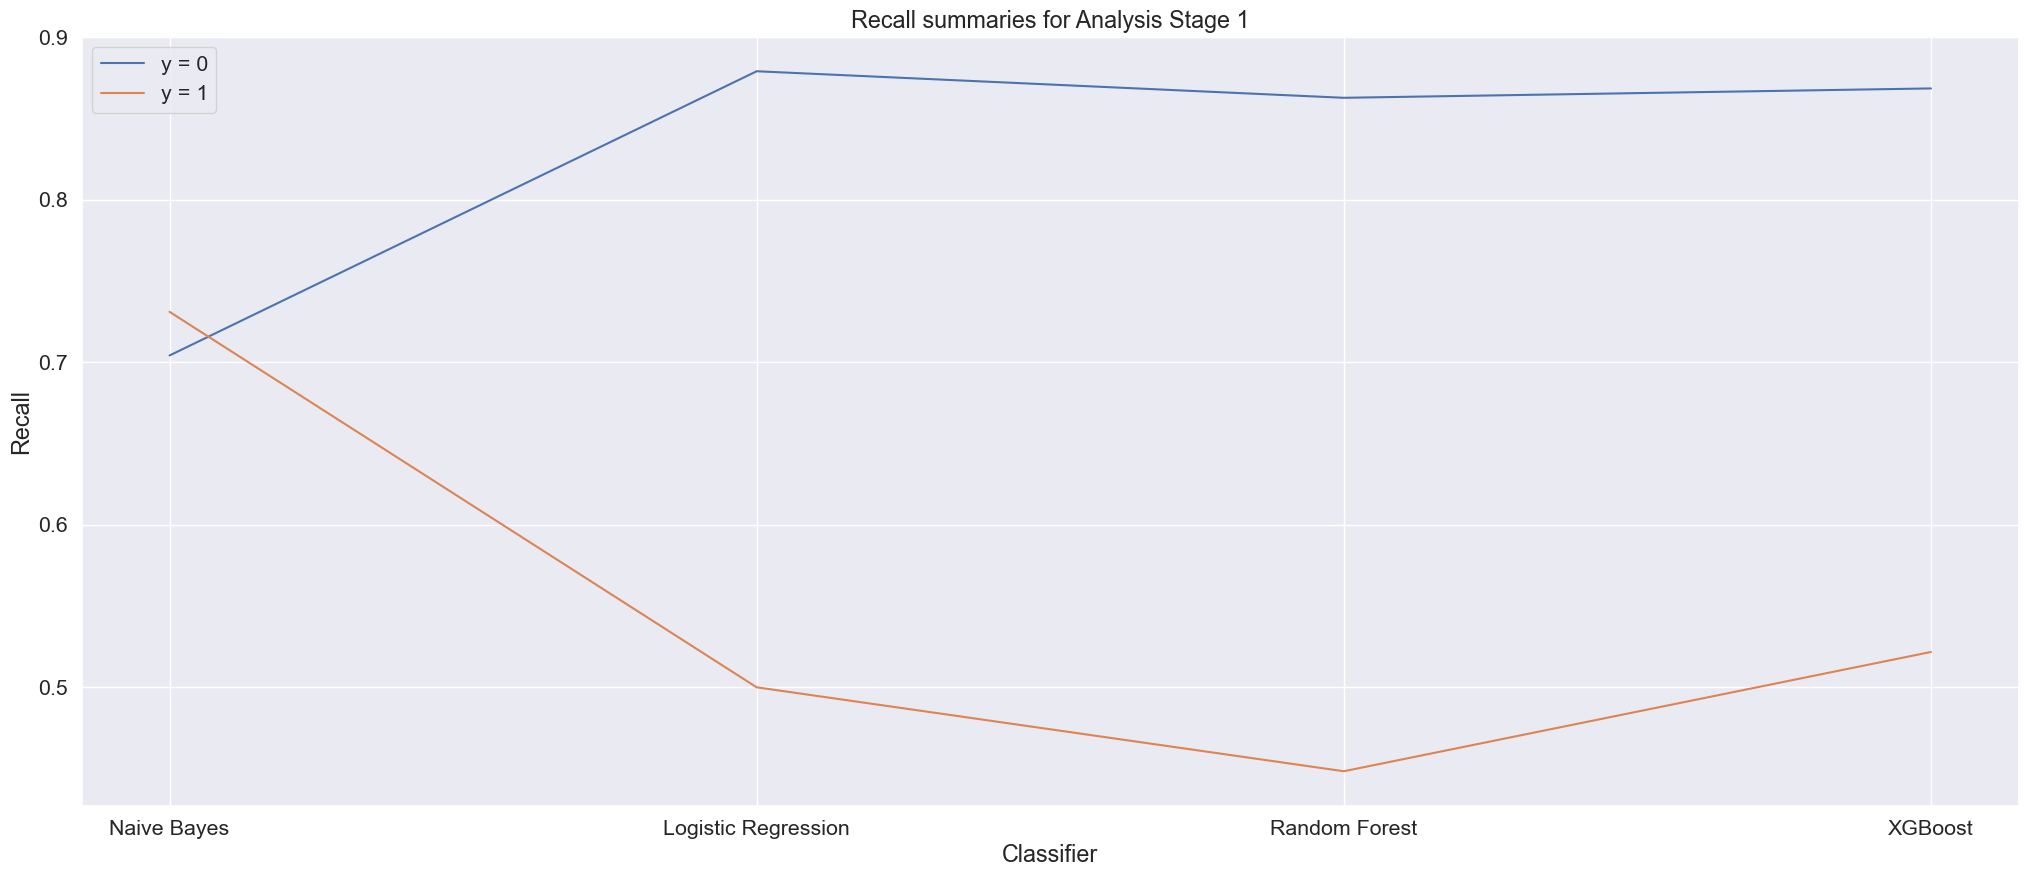

In [23]:
plt.figure(figsize=(25, 10))
plt.plot(results_df[results_df['y'] == 0]['Classifier'], results_df[results_df['y'] == 0]['Recall'], label = "y = 0")
plt.plot(results_df[results_df['y'] == 1]['Classifier'], results_df[results_df['y'] == 1]['Recall'], label = "y = 1")
plt.legend()
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title("Recall summaries for Analysis Stage 1")

plt.show()

Looks like the stage 1 of analysis performs poorly as far as guessing customers that have churned: indeed, all the classifiers for y = 1 have a lower recall (ie did not catch as many y = 1 as they should have) than all classifiers when y = 0. 

In [24]:
for classifier in classfiers.keys():
    print(f'{classifier} current parameters are:')
    pprint(classfiers[classifier].get_params().keys())

Naive Bayes current parameters are:
dict_keys(['priors', 'var_smoothing'])
Logistic Regression current parameters are:
dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])
Random Forest current parameters are:
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
XGBoost current parameters are:
dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimator

### Using RandomizedSearchCV as a strategy for hyperparameters tuning

In [25]:
parameters = [
    {"C": [1, 10, 100, 1000], "kernel": ['linear']},
    {"C": [1, 10, 100, 1000], "kernel": ['rbf'], "gamma": [0.5, 0.1, 0.01, 0.001, 0.0001]},
    {"C": [1], "kernel": ['rbf'], "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
]

In [26]:
classfiers  = {'Naive Bayes':GaussianNB(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest':RandomForestClassifier(),
               'XGBoost':XGBClassifier(),
              }

In [27]:
parameters_dic = {'Logistic Regression':{'penalty':['l2', 'elasticnet', 'none'],
                                         "C":[1000,100, 10, 1.0, 0.1, 0.01],
                                          "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                                        },
#                   'Random Forest':{'max_depth': [int(x) for x in np.linspace(1,15,5)],
#                                      'n_estimators': [int(x) for x in np.linspace(0,200,10)],
#                                   },
                  'Random Forest':{'bootstrap': [True,False],
                                     'max_depth': [int(x) for x in np.linspace(1,15,5)],
                                     'n_estimators': [int(x) for x in np.linspace(0,200,10)],
                                  },
                 'XGBoost': {'eta':[0.1,0.25,0.5,0.75,1],
                            'gamma':[0.1,1,10,100,1000],
                            'max_depth':[int(x) for x in np.linspace(1,15,5)],
                             'n_estimators': [int(x) for x in np.linspace(0,200,10)],
                            },
                 }

Fitting and training Logistic Regression classifier to the training data and evaluating against test set


C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
Value

LogisticRegression(C=10, penalty='none', solver='newton-cg')


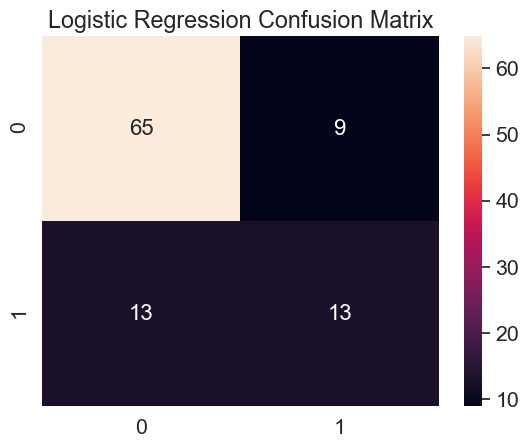

Fitting and training Random Forest classifier to the training data and evaluating against test set


C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than z

RandomForestClassifier(bootstrap=False, max_depth=11, n_estimators=66)


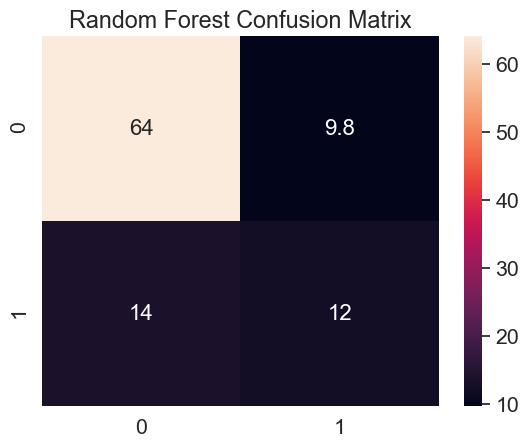

Fitting and training XGBoost classifier to the training data and evaluating against test set


C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\dimit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eta=1, gamma=10,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=8,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=133, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[18:13:56] WARNING: C:/Users/Administrator/workspace/xgb

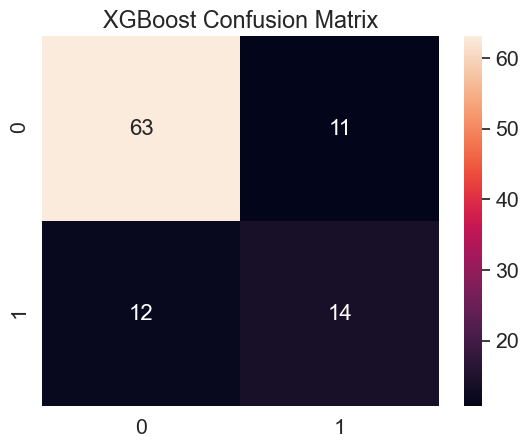

In [28]:
for classifier in classfiers.keys():
    if classifier not in ['Naive Bayes']:
        print('Fitting and training {classifier} classifier to the training data and evaluating against test set'.format(classifier = classifier))
        gs = RandomizedSearchCV(estimator=classfiers[classifier], param_distributions=parameters_dic[classifier], 
                      scoring=recall_score, cv=5, n_jobs=-1, random_state = 42)
        gs = gs.fit(X_train, y_train)
        if classifier == 'Logistic Regression':
            classfiers[classifier] = LogisticRegression(penalty = gs.best_params_['penalty'],
                                                       C = gs.best_params_['C'],
                                                       solver = gs.best_params_['solver'],
                                                       )
        elif classifier == 'XGBoost':
            classfiers[classifier] = XGBClassifier(eta = gs.best_params_['eta'],
                                                       gamma = gs.best_params_['gamma'],
                                                       max_depth = gs.best_params_['max_depth'],
                                                       n_estimators = gs.best_params_['n_estimators'],
                                                  )
        elif classifier == 'Random Forest':
            classfiers[classifier] = RandomForestClassifier(bootstrap = gs.best_params_['bootstrap'],
                                                       n_estimators = gs.best_params_['n_estimators'],
                                                       max_depth = gs.best_params_['max_depth'],
                                                  )
#         elif classifier == 'Naive Bayes':
#             classfiers[classifier] = GaussianNB(C = gs.best_params_['C'],
#                                                        penalty = gs.best_params_['penalty'],
#                                                   )
        print(classfiers[classifier])
        classfiers[classifier].fit(X_train, y_train)
        y_pred = classfiers[classifier].predict(X_test)

        cm = (confusion_matrix(y_test,y_pred) / confusion_matrix(y_test,y_pred).astype(np.float).sum()) *100
        df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
        sn.set(font_scale=1.4)
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
        plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
        plt.show()
        CR = classification_report(y_test, y_pred, output_dict=True)
        CR = pd.DataFrame(CR).transpose()[:2]
        for line_number in range(0,len(CR)):
            results_df = results_df.append({'Classifier':classifier,'Analysis Stage':1,'y':line_number,'Grid Search':'Yes',
                                           'Accuracy':accuracy_score(y_test, y_pred),'Precision':CR['precision'][line_number],
                                            'Recall':CR['recall'][line_number],'F1-Score':CR['f1-score'][line_number]
                                           },ignore_index=True)

In [29]:
results_df.sort_values(by = ['Recall'], ascending=False)[results_df['Classifier'] == 'Logistic Regression']

<ipython-input-29-1ac5602039f9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df.sort_values(by = ['Recall'], ascending=False)[results_df['Classifier'] == 'Logistic Regression']


,Classifier,Analysis Stage,y,Grid Search,Accuracy,Precision,Recall,F1-Score
2,Logistic Regression,1,0,No,0.779986,0.832575,0.878963,0.855140
8,Logistic Regression,1,0,Yes,0.779276,0.832423,0.878002,0.854605
3,Logistic Regression,1,1,No,0.779986,0.593548,0.500000,0.542773
9,Logistic Regression,1,1,Yes,0.779276,0.591640,0.500000,0.541973


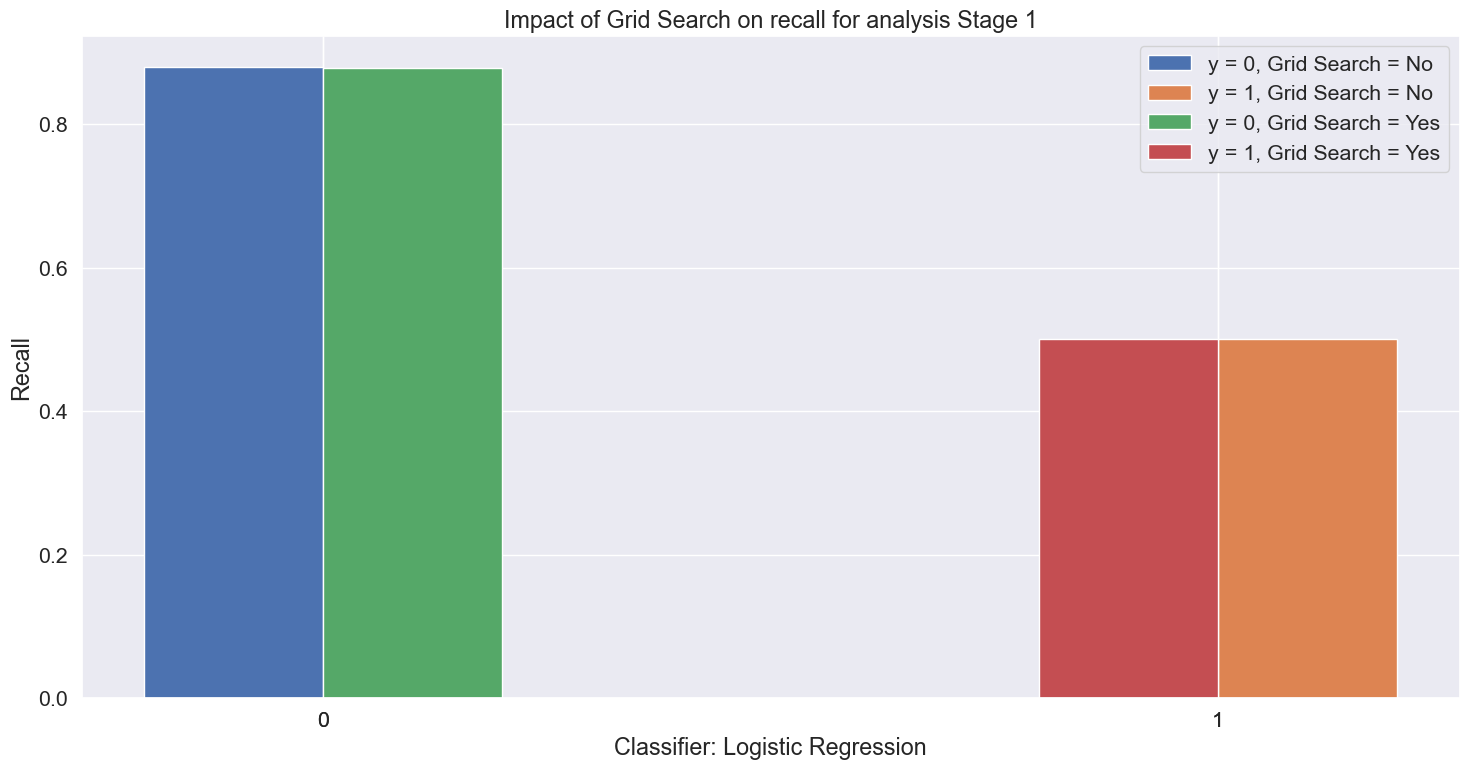

In [30]:
width = 0.20
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 0)]['y'] - width/2, results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 0)]['Recall'], width, label='y = 0, Grid Search = No')
rects2 = ax.bar(results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 1)]['y'] + width/2, results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 1)]['Recall'], width, label='y = 1, Grid Search = No')
rects3 = ax.bar(results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 0)]['y'] + width/2, results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 0)]['Recall'], width, label='y = 0, Grid Search = Yes')
rects4 = ax.bar(results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 1)]['y'] - width/2, results_df[(results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 1)]['Recall'], width, label='y = 1, Grid Search = Yes')



plt.xticks(results_df[results_df['Classifier'] == 'Logistic Regression']['y'].values.tolist())
plt.ylabel('Recall')
plt.xlabel('Classifier: Logistic Regression')
plt.title('Impact of Grid Search on recall for analysis Stage 1')
plt.legend()
fig.tight_layout()
plt.show()

Interesting phenomenon here: the grid search has actually decreased the recall for y = 0, while the recal did not change for y = 1 (0.5 with or without grid search)

# Analysis stage 2

In [31]:
classfiers  = {'Naive Bayes':GaussianNB(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest':RandomForestClassifier(),
               'XGBoost':XGBClassifier(),
              }

# Address data imbalance

In [32]:
print(pd.DataFrame(y_train).value_counts())
print(pd.DataFrame(y_test).value_counts())

0    4133
1    1501
dtype: int64
0    1041
1     368
dtype: int64


In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape)

(8266, 5)


In [34]:
print(pd.DataFrame(y_train).value_counts())
print(pd.DataFrame(y_test).value_counts())

1    4133
0    4133
dtype: int64
0    1041
1     368
dtype: int64


Fitting and training Naive Bayes classifier to the training data and evaluating against test set


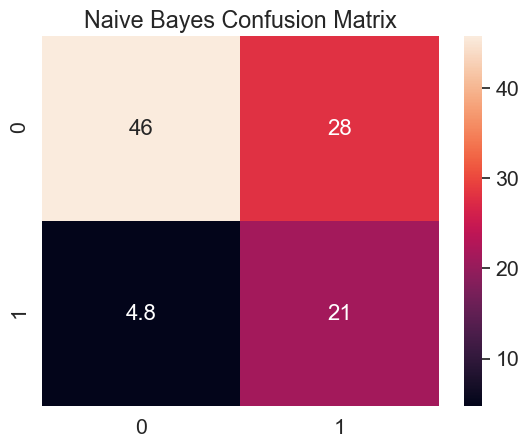

GaussianNB()
Fitting and training Logistic Regression classifier to the training data and evaluating against test set


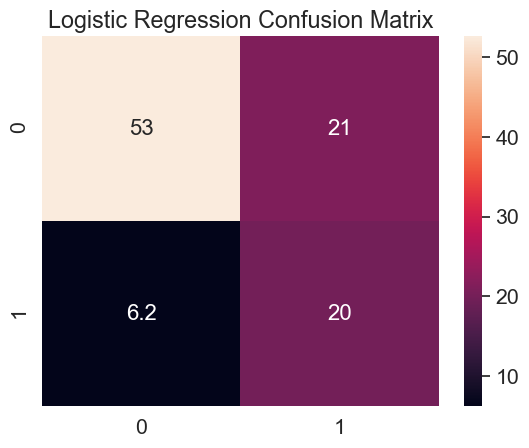

LogisticRegression()
Fitting and training Random Forest classifier to the training data and evaluating against test set


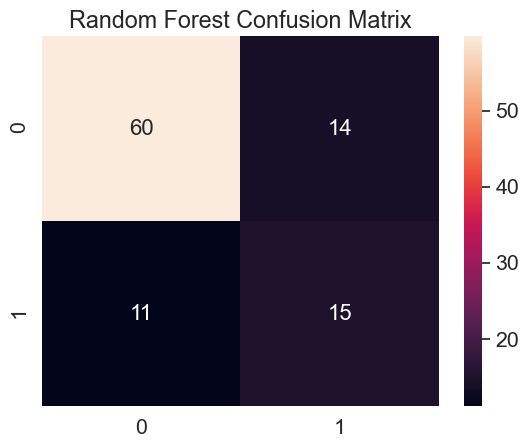

RandomForestClassifier()
Fitting and training XGBoost classifier to the training data and evaluating against test set
[18:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dimit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


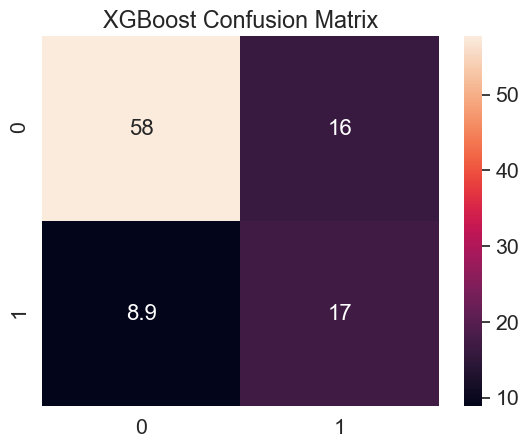

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [35]:
for classifier in classfiers.keys():
    print('Fitting and training {classifier} classifier to the training data and evaluating against test set'.format(classifier = classifier))
    classfiers[classifier].fit(X_train, y_train)
    y_pred = classfiers[classifier].predict(X_test)
    cm = (confusion_matrix(y_test,y_pred) / confusion_matrix(y_test,y_pred).astype(np.float).sum()) *100
    df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
    plt.show()
    print(classfiers[classifier])
    CR = classification_report(y_test, y_pred, output_dict=True)
    CR = pd.DataFrame(CR).transpose()[:2]
    for line_number in range(0,len(CR)):
        results_df = results_df.append({'Classifier':classifier,'Analysis Stage':2,'y':line_number,'Grid Search':'No',
                                       'Accuracy':accuracy_score(y_test, y_pred),'Precision':CR['precision'][line_number],
                                        'Recall':CR['recall'][line_number],'F1-Score':CR['f1-score'][line_number]
                                       },ignore_index=True)

In [36]:
results_df.sort_values(by = ['Recall'], ascending=False)[results_df['Analysis Stage'] == 2]

<ipython-input-36-341c5f28ded2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df.sort_values(by = ['Recall'], ascending=False)[results_df['Analysis Stage'] == 2]


,Classifier,Analysis Stage,y,Grid Search,Accuracy,Precision,Recall,F1-Score
15,Naive Bayes,2,1,No,0.671398,0.431851,0.817935,0.565258
18,Random Forest,2,0,No,0.746629,0.842000,0.808838,0.825086
20,XGBoost,2,0,No,0.748758,0.865815,0.780980,0.821212
17,Logistic Regression,2,1,No,0.725337,0.483592,0.760870,0.591341
16,Logistic Regression,2,0,No,0.725337,0.893976,0.712776,0.793159
21,XGBoost,2,1,No,0.748758,0.514894,0.657609,0.577566
14,Naive Bayes,2,0,No,0.671398,0.905899,0.619597,0.735881
19,Random Forest,2,1,No,0.746629,0.513447,0.570652,0.540541


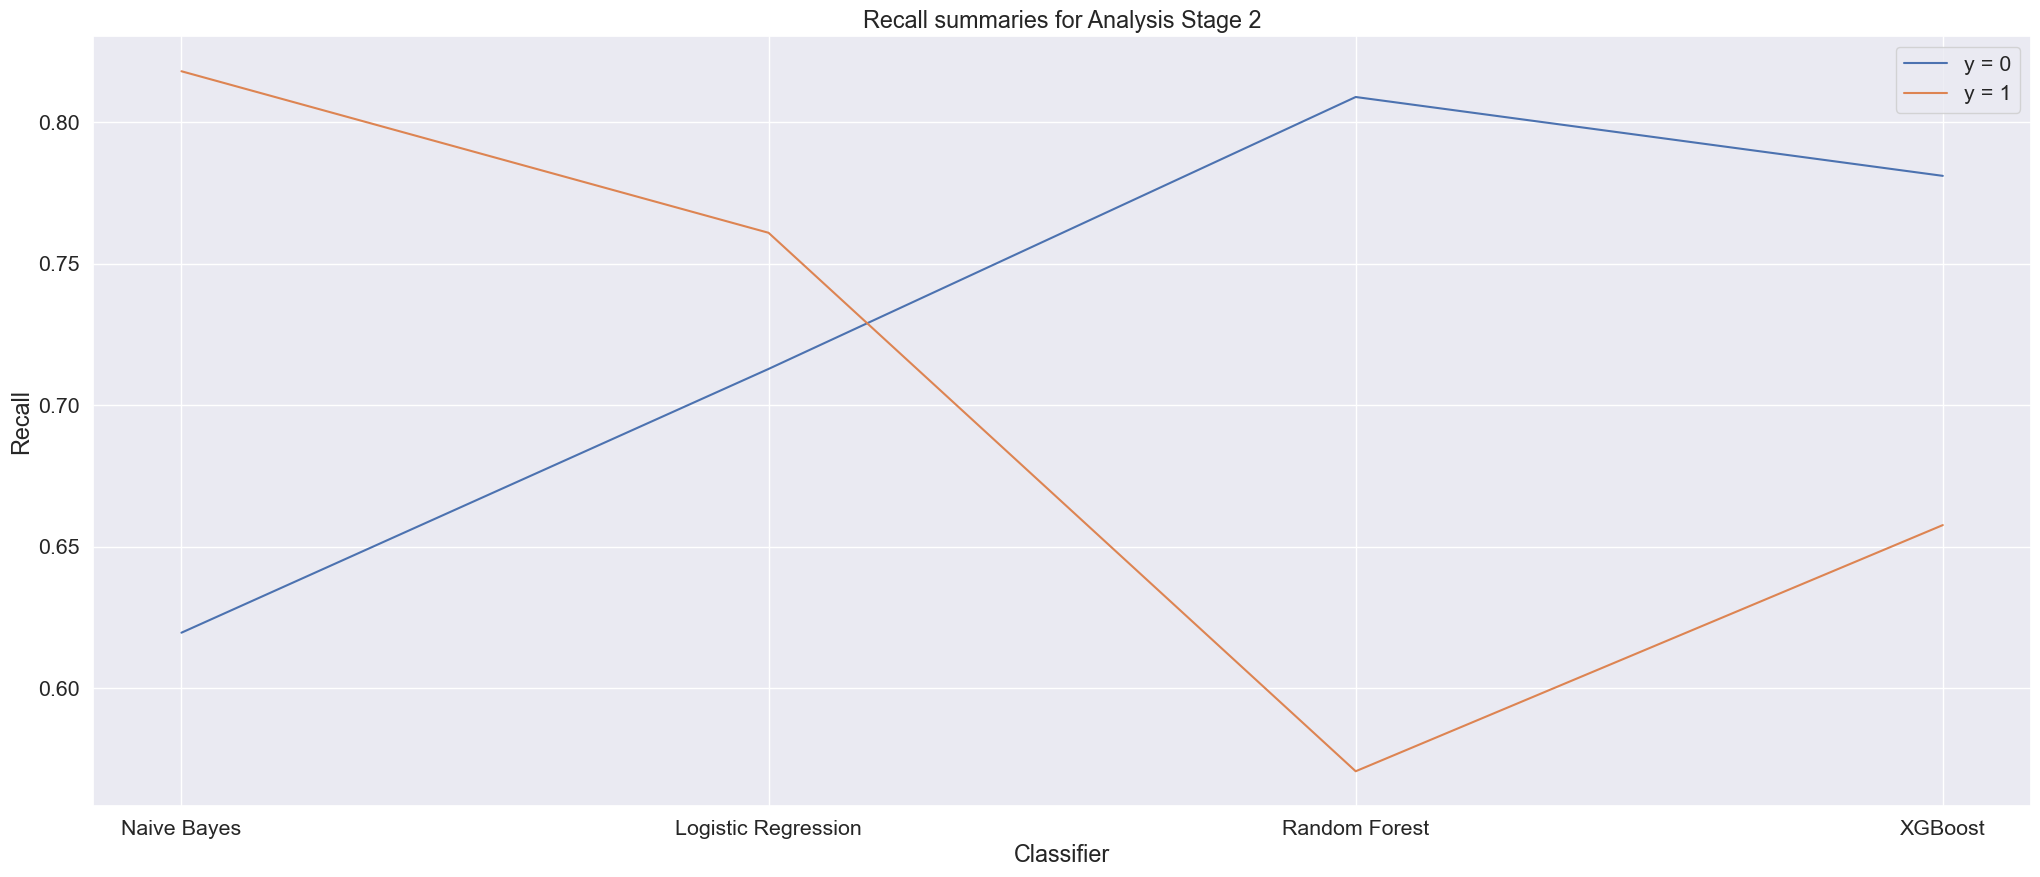

In [37]:
plt.figure(figsize=(25, 10))
plt.plot(results_df[(results_df['y'] == 0) & (results_df['Analysis Stage'] == 2)]['Classifier'], results_df[(results_df['y'] == 0) & (results_df['Analysis Stage'] == 2)]['Recall'], label = "y = 0")
plt.plot(results_df[(results_df['y'] == 1) & (results_df['Analysis Stage'] == 2)]['Classifier'], results_df[(results_df['y'] == 1) & (results_df['Analysis Stage'] == 2)]['Recall'], label = "y = 1")
plt.legend()
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title("Recall summaries for Analysis Stage 2")
plt.show()

Overall we can say that Naive Bayes is having the higest recall of stage 2 analysis for y = 1 (ie. correctly guessing most of the customer who have churned). Interesting to see that happening despite the simplicity of Naive Bayes model
Now just to see what is the benefit of resampling, let's compare stage 1 vs stage 2 recalls for y = 1

### Using GridSearch as a strategy for hyperparameters tuning

Fitting and training Logistic Regression classifier to the training data and evaluating against test set


C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
Value

LogisticRegression(C=10, penalty='none', solver='newton-cg')


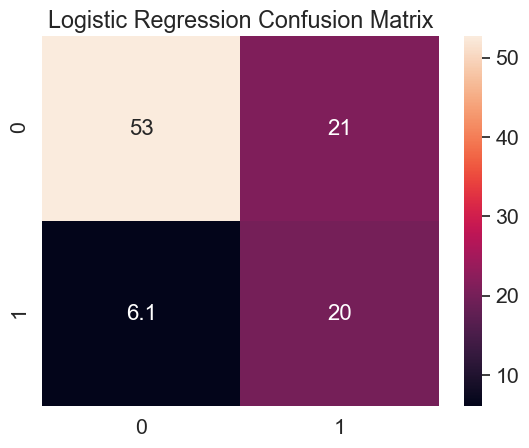

Fitting and training Random Forest classifier to the training data and evaluating against test set


C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\dimit\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than z

RandomForestClassifier(bootstrap=False, max_depth=11, n_estimators=66)


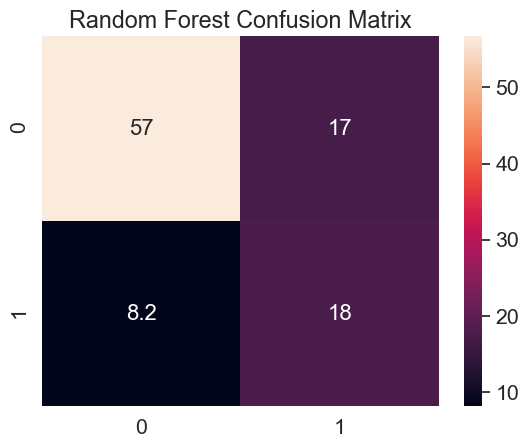

Fitting and training XGBoost classifier to the training data and evaluating against test set


C:\Users\dimit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\dimit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eta=1, gamma=10,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=8,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=133, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[18:14:42] WARNING: C:/Users/Administrator/workspace/xgb

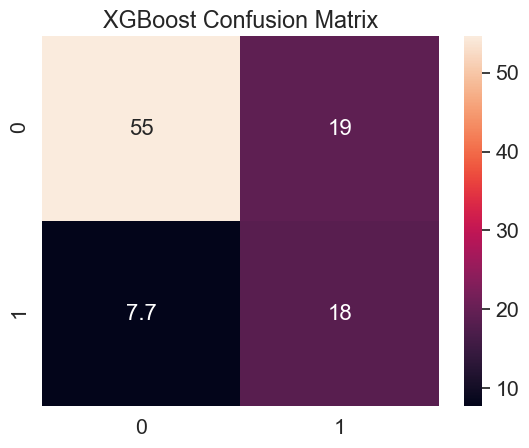

In [38]:
for classifier in classfiers.keys():
    if classifier not in ['Naive Bayes']:
        print('Fitting and training {classifier} classifier to the training data and evaluating against test set'.format(classifier = classifier))
        gs = RandomizedSearchCV(estimator=classfiers[classifier], param_distributions=parameters_dic[classifier], 
                      scoring=recall_score, cv=5, n_jobs=-1, random_state = 42)
        gs = gs.fit(X_train, y_train)
        if classifier == 'Logistic Regression':
            classfiers[classifier] = LogisticRegression(penalty = gs.best_params_['penalty'],
                                                       C = gs.best_params_['C'],
                                                       solver = gs.best_params_['solver'],
                                                       )
        elif classifier == 'XGBoost':
            classfiers[classifier] = XGBClassifier(eta = gs.best_params_['eta'],
                                                       gamma = gs.best_params_['gamma'],
                                                       max_depth = gs.best_params_['max_depth'],
                                                       n_estimators = gs.best_params_['n_estimators'],
                                                  )
        elif classifier == 'Random Forest':
            classfiers[classifier] = RandomForestClassifier(bootstrap = gs.best_params_['bootstrap'],
                                                       n_estimators = gs.best_params_['n_estimators'],
                                                       max_depth = gs.best_params_['max_depth'],
                                                  )
        print(classfiers[classifier])
        classfiers[classifier].fit(X_train, y_train)
        y_pred = classfiers[classifier].predict(X_test)

        cm = (confusion_matrix(y_test,y_pred) / confusion_matrix(y_test,y_pred).astype(np.float).sum()) *100
        df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
        sn.set(font_scale=1.4)
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
        plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
        plt.show()
        CR = classification_report(y_test, y_pred, output_dict=True)
        CR = pd.DataFrame(CR).transpose()[:2]
        for line_number in range(0,len(CR)):
            results_df = results_df.append({'Classifier':classifier,'Analysis Stage':2,'y':line_number,'Grid Search':'Yes',
                                           'Accuracy':accuracy_score(y_test, y_pred),'Precision':CR['precision'][line_number],
                                            'Recall':CR['recall'][line_number],'F1-Score':CR['f1-score'][line_number]
                                           },ignore_index=True)

In [39]:
results_df.sort_values(by = ['Recall'], ascending=False)[(results_df['Analysis Stage'] == 2) &(results_df['Classifier'] == 'Logistic Regression')]

<ipython-input-39-ca93259151cd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df.sort_values(by = ['Recall'], ascending=False)[(results_df['Analysis Stage'] == 2) &(results_df['Classifier'] == 'Logistic Regression')]


,Classifier,Analysis Stage,y,Grid Search,Accuracy,Precision,Recall,F1-Score
23,Logistic Regression,2,1,Yes,0.727466,0.486207,0.766304,0.594937
17,Logistic Regression,2,1,No,0.725337,0.483592,0.760870,0.591341
22,Logistic Regression,2,0,Yes,0.727466,0.896261,0.713737,0.794652
16,Logistic Regression,2,0,No,0.725337,0.893976,0.712776,0.793159


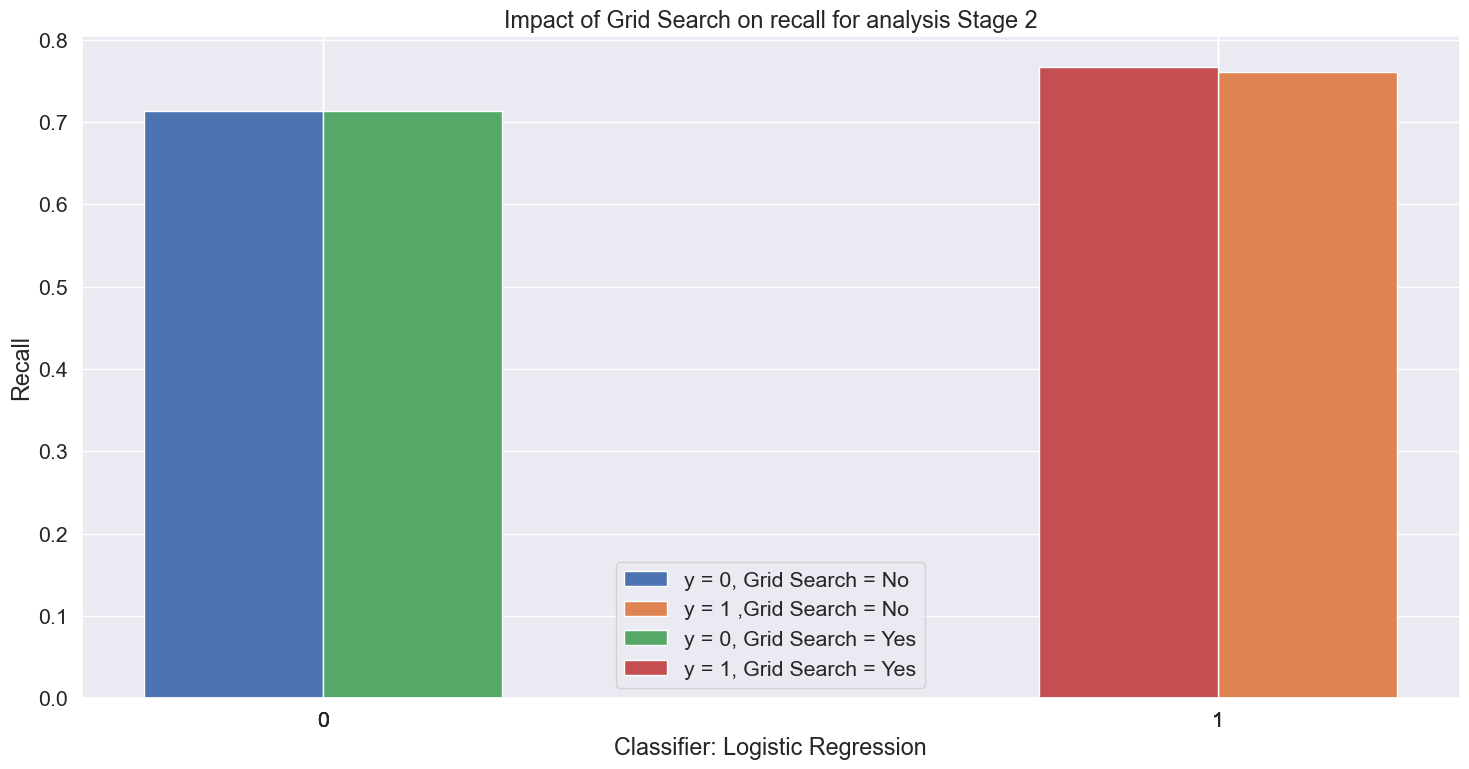

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 0)]['y'] - width/2, results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 0)]['Recall'], width, label='y = 0, Grid Search = No')
# ax.set_xticks(x, labels)
rects2 = ax.bar(results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 1)]['y'] + width/2, results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'No') & (results_df['y'] == 1)]['Recall'], width, label='y = 1 ,Grid Search = No')
rects3 = ax.bar(results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 0)]['y'] + width/2, results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 0)]['Recall'], width, label='y = 0, Grid Search = Yes')
rects4 = ax.bar(results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 1)]['y'] - width/2, results_df[(results_df['Analysis Stage'] == 2) & (results_df['Classifier'] == 'Logistic Regression') & (results_df['Grid Search'] == 'Yes') & (results_df['y'] == 1)]['Recall'], width, label='y = 1, Grid Search = Yes')

plt.xticks(results_df[results_df['Classifier'] == 'Logistic Regression']['y'].values.tolist())
plt.ylabel('Recall')
plt.xlabel('Classifier: Logistic Regression')
plt.title('Impact of Grid Search on recall for analysis Stage 2')
plt.legend()
fig.tight_layout()
plt.show()

In [46]:
results_df[results_df['y'] == 1].sort_values(by = ['Recall'], ascending=False)

,Classifier,Analysis Stage,y,Grid Search,Accuracy,Precision,Recall,F1-Score
15,Naive Bayes,2,1,No,0.671398,0.431851,0.817935,0.565258
23,Logistic Regression,2,1,Yes,0.727466,0.486207,0.766304,0.594937
17,Logistic Regression,2,1,No,0.725337,0.483592,0.760870,0.591341
1,Naive Bayes,1,1,No,0.711143,0.466205,0.730978,0.569312
27,XGBoost,2,1,Yes,0.730305,0.488679,0.703804,0.576837
25,Random Forest,2,1,Yes,0.745919,0.510121,0.684783,0.584687
21,XGBoost,2,1,No,0.748758,0.514894,0.657609,0.577566
19,Random Forest,2,1,No,0.746629,0.513447,0.570652,0.540541
13,XGBoost,1,1,Yes,0.772889,0.568182,0.543478,0.555556
7,XGBoost,1,1,No,0.777857,0.583587,0.521739,0.550933


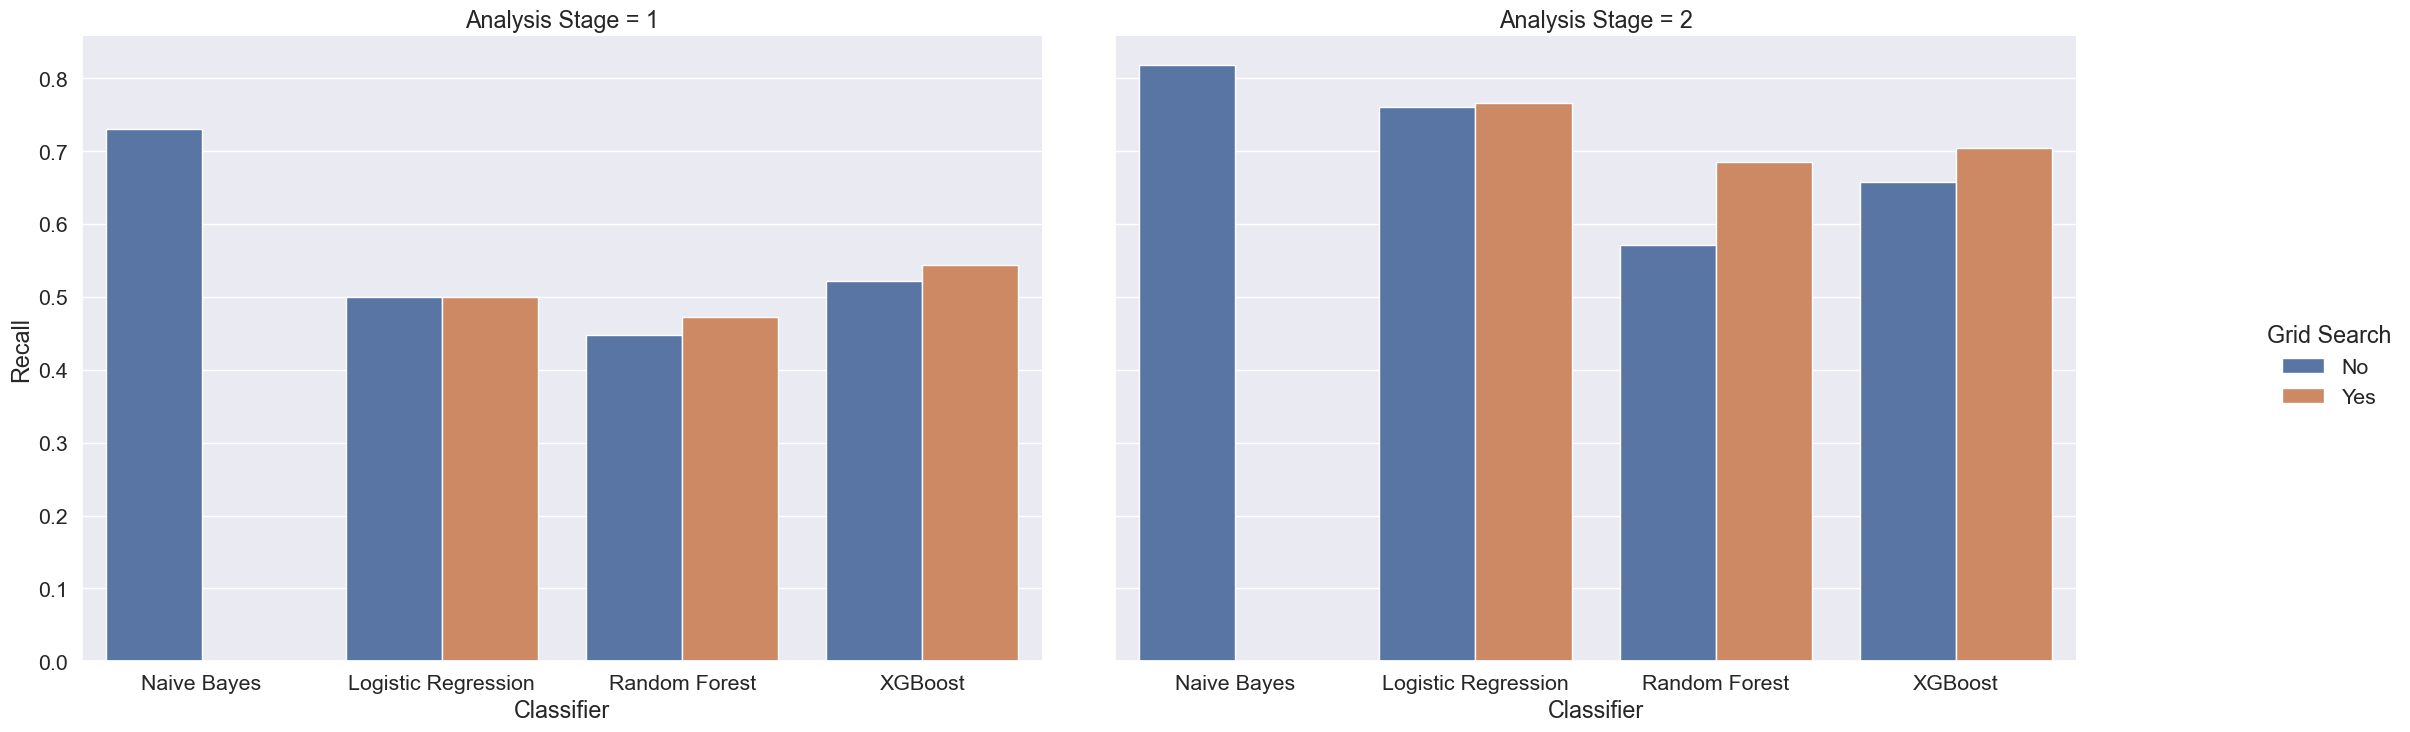

In [42]:
figure = sn.catplot(
    data=results_df[results_df['y'] == 1], kind='bar',y='Recall',x='Classifier',hue = 'Grid Search',col='Analysis Stage',
    legend_out=True
)
figure.fig.set_size_inches(25,8)

We can see that the grid search strategy had a massive impact on the recall of all classifiers it has been applied to. The biggest jump in recall was random forest classifier learned on SMOTE set, where recall went from about 0.58 to 0.69.

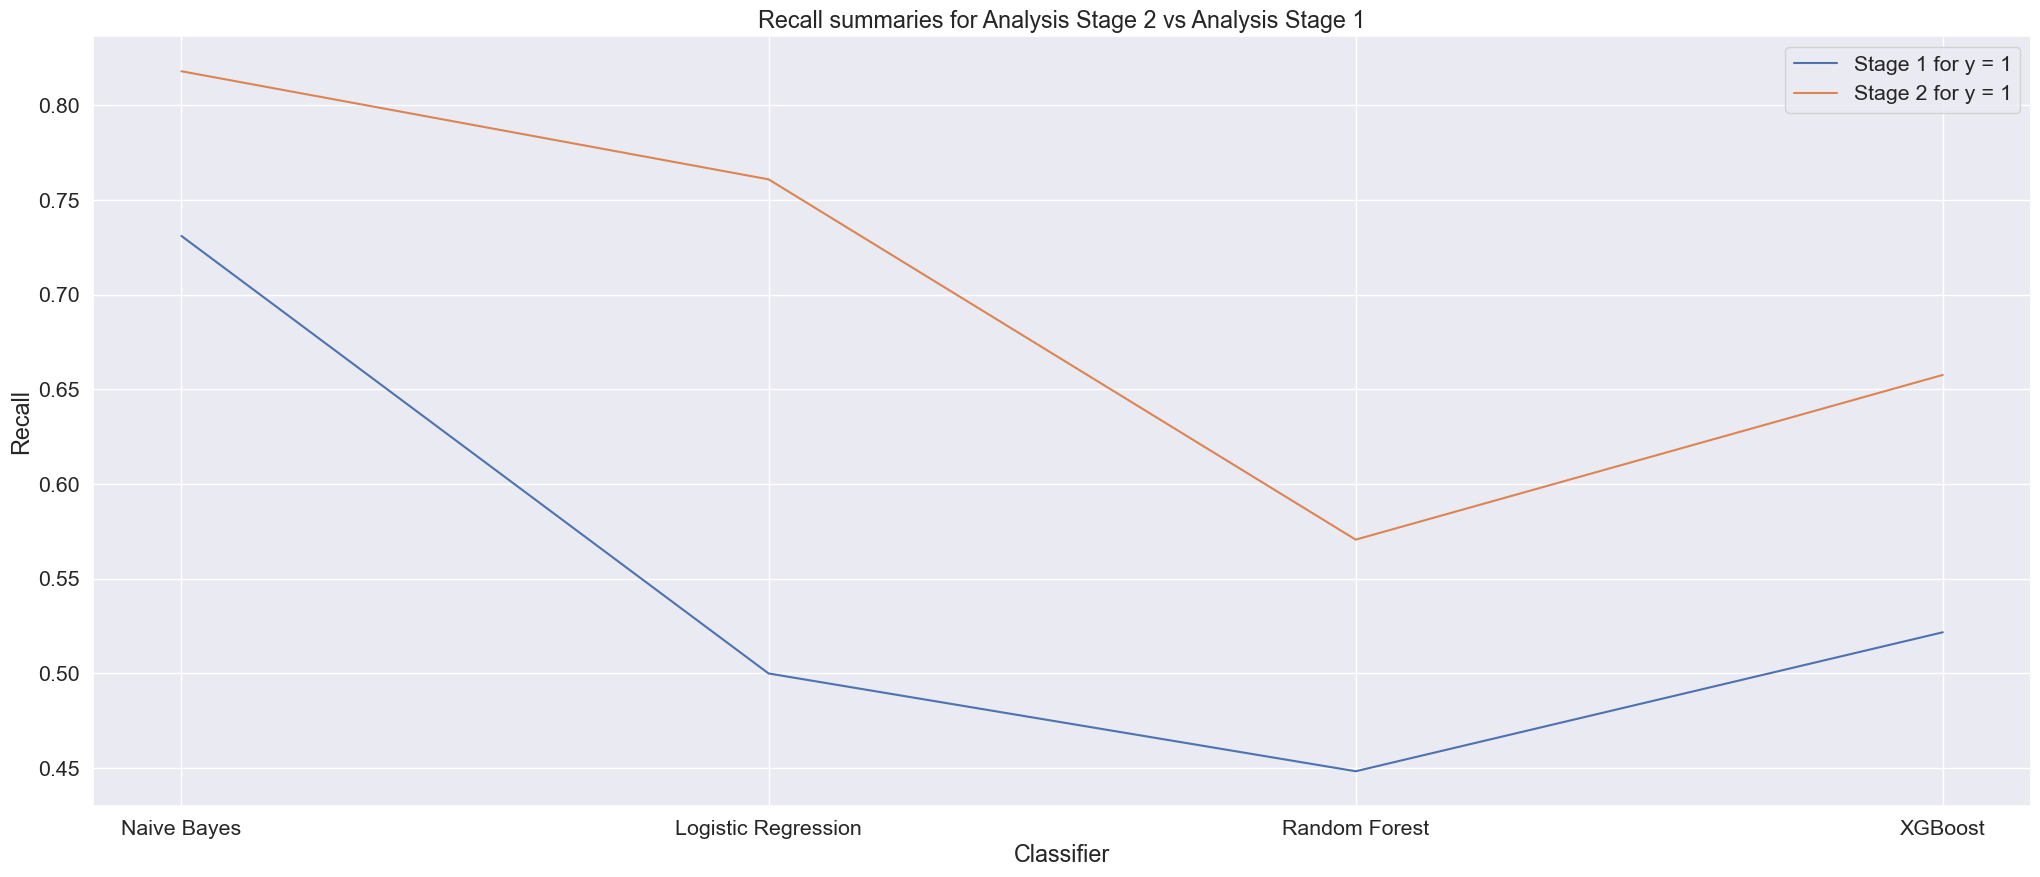

In [43]:
plt.figure(figsize=(25, 10))
plt.plot(results_df[(results_df['y'] == 1) & (results_df['Analysis Stage'] == 1) & (results_df['Grid Search'] == 'No')]['Classifier'], results_df[(results_df['y'] == 1) & (results_df['Analysis Stage'] == 1) & (results_df['Grid Search'] == 'No')]['Recall'], label = "Stage 1 for y = 1")
plt.plot(results_df[(results_df['y'] == 1) & (results_df['Analysis Stage'] == 2) & (results_df['Grid Search'] == 'No')]['Classifier'], results_df[(results_df['y'] == 1) & (results_df['Analysis Stage'] == 2) & (results_df['Grid Search'] == 'No')]['Recall'], label = "Stage 2 for y = 1")
plt.legend()
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.title("Recall summaries for Analysis Stage 2 vs Analysis Stage 1")
plt.show()

Very easy to see that SMOTE technique had a massive impact when it comes to the recall of customer who have churned (y = 1) accross all classifiers. Here again, we see that Naive Bayes outperforms all other classifiers in all analysis stages. Another interesting phenomenon to notice is that decision-tree based classifiers tend to have a lower recall than LR and NB